In [18]:
#必要なライブラリ・モジュールの読み込み

#matplotlibの読み込み・日本語化
!pip install japanize-matplotlib #matplotlib日本語化ライブラリのインストール
import matplotlib as plt         #matplotlibライブラリのインポート
import japanize_matplotlib       #matplotlib日本語化ライブラリのインポート
import seaborn as sns            #seabornライブラリのインポート
sns.set(font="IPAexGothic")

#その他ライブラリの読み込み
import math                                         #mathライブラリのインポート
import numpy as np                                  #numpyライブラリのインポート
from matplotlib import pyplot as plt,animation,rc   #matplotlibライブラリのパッケージのインポート
from scipy.integrate import odeint                  #scipyライブラリのodeintパッケージのインポート

#カラーパレット
blue=(0,0,1)
lightblue=(0.5,0.5,1,0.5)
orange=(1,0.5,0)
lightorange=(1,0.75,0.5,0.5)
green=(0,1,0)
lightgreen=(0.5,1,0.5,0.5)
red=(1,0,0)
lightred=(1,0.5,0.5,0.5)
white=(1,1,1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
#シミュレーションの描画
fps = 5
simulation_time = 100                 #描画の終了時間：100=10秒：適宜調節
t_span=[0.0,simulation_time]          #シミュレート時間（[0,100]だと0秒～10秒の結果を表示）
flames=int((t_span[1]-t_span[0])*fps) #フレームの計算（グラフ上部に表示）
t_eval=np.linspace(*t_span,flames)    #描画に使用する数値配列
speed=10                              #再生スピード
interval=100/fps/speed                #フレーム間の時間[ms]（大きいとスローになる）

In [20]:
#グラフの描画範囲：適宜調節
figtop = 100    #描画範囲の指定（上）：適宜調節
figbottom = 0   #描画範囲の指定（下）：適宜調節
figleft = 0     #描画範囲の指定（左）：適宜調節
figright = 100  #描画範囲の指定（右）：適宜調節

In [ ]:
#等速・等加速直線運動

#グラフの描画範囲
figtop = 100
figbottom = 0
figleft = 0
figright = 100

#2階常微分方程式（運動方程式、等速・等加速度直線運動）
def func_motion(var, t):
    dxdt = var[1]
    dvdt = a

    return [dxdt, dvdt]

#メイン実行部
if (__name__ == '__main__'):
    t_list = np.linspace(0.0, 10.0, 500)  #微分の時間間隔の設定
    #初速度
    v0 = 40 #@param {type:"slider", min:0, max:50, step:5}
    #加速度
    a = 0 #@param {type:"slider", min:0, max:20, step:5}
    m_init = [0, v0]  #位置と速度の初期値
    m_list = odeint(func_motion, m_init, t_list)
    
    print ('初速度v0：%d[m/s]'%v0)
    print ('加速度a：%d[m/s^2]'%a)

def update(k):
    sfi=25 #ストロボのフレーム間隔

    plt.cla()
    plt.xlim(figleft,figright)
    plt.ylim(figbottom,figtop)
    plt.title('step='+str(k))
    plt.text(0,90,'時間：%d[s]'%(k/(fps*5)))
    plt.text(0,80,'速度：%d[m/s]'%abs(m_list[k,1]))

    plt.scatter(m_list[k,0],50,marker='o',color=blue,s=500)
    plt.scatter(m_list[0:k:sfi,0],(m_list[0:k:sfi,0]*0+50),marker='o',color=lightblue,s=500) #ストロボ

fig = plt.figure();
movie = animation.FuncAnimation(fig,update,frames=len(t_eval),interval=interval)
rc('animation',html='jshtml');
movie

In [ ]:
#鉛直投げ上げ

#グラフの描画範囲
figtop = 135
figbottom = -20
figleft = 0
figright = 5

#2階常微分方程式（運動方程式、鉛直投げ上げ）
def func_motion(var, t):
    dxdt = var[1]
    dvdt = -gravity

    return [dxdt, dvdt]

#メイン実行部
if (__name__ == '__main__'):
    t_list = np.linspace(0.0, 10.0, 500)  #微分の時間間隔の設定
    #質量
    m = 10 #@param {type:"slider", min:0, max:100, step:10}
    #初速度
    v0 = 50 #@param {type:"slider", min:0, max:50, step:5}
    gravity = 9.80665   #重力加速度
    m_init = [0.0, v0]  #高さと速度の初期値
    m_list = odeint(func_motion, m_init, t_list)

    print ('質量m：%d[kg]'%m)
    print ('初速度v0：%d[m/s]'%v0)

def update(k):
    sfi=25 #ストロボのフレーム間隔

    U1=m*gravity*m_list[k,0]    #位置エネルギー
    U2=(1/2)*m*m_list[k,1]**2   #運動エネルギー

    plt.cla()
    plt.xlim(figleft,figright)
    plt.ylim(figbottom,figtop)
    plt.title('step='+str(k))
    plt.text(0,120,'時間：%d[s]'%(k/(fps*5)))
    plt.text(0,110,'速度：%d[m/s]'%m_list[k,1])

    plt.scatter(2.5,m_list[k,0],marker='o',color=lightorange,s=U1) #位置エネルギー
    plt.scatter(2.5,m_list[k,0],marker='o',color=lightgreen,s=U2) #運動エネルギー
    plt.scatter(2.5,m_list[k,0],marker='o',color=blue,s=500)
    plt.scatter((m_list[0:k:sfi,0]*0+2.5),m_list[0:k:sfi,0],marker='o',color=lightblue,s=500) #ストロボ

fig = plt.figure();
movie = animation.FuncAnimation(fig,update,frames=len(t_eval),interval=interval)
rc('animation',html='jshtml');
movie

In [ ]:
#斜方投射

#グラフの描画範囲
figtop = 135
figbottom = -75
figleft = -20
figright = 550

#2階常微分方程式（運動方程式、等速直線運動）
def func_motion_x(var, t):
    dxdt = var[1]
    dvdt = 0

    return [dxdt, dvdt]

#2階常微分方程式（運動方程式、鉛直投げ上げ）
def func_motion_y(var, t):
    dydt = var[1]
    dvdt = -gravity

    return [dydt, dvdt]

#メイン実行部
if (__name__ == '__main__'):
    t_list = np.linspace(0.0, 10.0, 500)  #微分の時間間隔の設定
    #質量
    m = 10 #@param {type:"slider", min:0, max:100, step:10}
    #初速度
    v0 = 50 #@param {type:"slider", min:0, max:50, step:5}
    #角度
    θ = 45 #@param {type:"slider", min:0, max:90, step:5}
    gravity = 9.80665   #重力加速度

    v0x = v0 * round(math.cos(math.radians(θ)), 3)
    v0y = v0 * round(math.sin(math.radians(θ)), 3)

    m_initx = [0.0, v0x]  #x座標の高さと速度の初期値
    m_inity = [0.0, v0y]  #y座標の高さと速度の初期値
    m_list_x = odeint(func_motion_x, m_initx, t_list)
    m_list_y = odeint(func_motion_y, m_inity, t_list)

    print ('質量m：%d[kg]'%m)
    print ('初速度v0：%d[m/s]'%v0)
    print ('角度θ：%d[°]'%θ)

def update(k):
    sfi=25 #ストロボのフレーム間隔

    v=math.sqrt(np.around(m_list_x[k,1]**2,10)+np.around(m_list_y[k,1]**2,10))
    U1=m*gravity*m_list_y[k,0]    #位置エネルギー
    U2=(1/2)*m*v**2   #運動エネルギー

    plt.cla()
    plt.xlim(figleft,figright)
    plt.ylim(figbottom,figtop)
    plt.title('step='+str(k))
    plt.text(0,120,'時間：%d[s]'%(k/(fps*5)))
    plt.text(0,110,'速度：%d[m/s]'%v)
    plt.text(0,100,'速度(x)：%d[m/s]'%m_list_x[k,1])
    plt.text(0,90,'速度(y)：%d[m/s]'%m_list_y[k,1])

    plt.scatter(m_list_x[k,0],m_list_y[k,0],marker='o',color=lightorange,s=U1) #位置エネルギー
    plt.scatter(m_list_x[k,0],m_list_y[k,0],marker='o',color=lightgreen,s=U2) #運動エネルギー
    plt.scatter(m_list_x[k,0],m_list_y[k,0],marker='o',color=blue,s=500)
    plt.scatter(m_list_x[0:k:sfi,0],m_list_y[0:k:sfi,0],marker='o',color=lightblue,s=500) #ストロボ

fig = plt.figure();
movie = animation.FuncAnimation(fig,update,frames=len(t_eval),interval=interval)
rc('animation',html='jshtml');
movie

In [ ]:
#自由落下

v = [0] * 10
m_list_f = []
i = 0
time = 0
first = True

#グラフの描画範囲
figtop = 105
figbottom = -20
figleft = 0
figright = 5

#2階常微分方程式（運動方程式、自由落下）
def func_motion(var, t):
    dxdt = var[1]
    dvdt = -gravity

    return [dxdt, dvdt]

#メイン実行部：値はここ
if (__name__ == '__main__'):
    t_list = np.linspace(0.0, 10.0, 500)  #微分の時間間隔の設定
    #質量
    m = 10 #@param {type:"slider", min:0, max:100, step:10}
    #初速度
    v.append(0)
    #高さ
    h = 100 #@param {type:"slider", min:0, max:100, step:10}
    gravity = 9.80665 #重力加速度
    #反発係数
    e = 0.7 #@param {type:"slider", min:0, max:1, step:0.1}

    for j in range(10):
      m_init = [h, v[j]]
      m_list = odeint(func_motion, m_init, t_list)
      m_list_f.append(m_list)
      for i in range(500):
        if m_list[i,0] < 0:
          v[j] = m_list[i,1]
          #print ('最高速度v：%f[m/s]'%v[j])
          v[j+1] = np.around(-v[j] * e,10)
          #print ('反発速度v：%f[m/s]'%v[j+1])
          h = 0
          break

    print ('質量m：%d[kg]'%m)
    print ('高さh：%d[m]'%h)

def update(k):
    global i,time,first

    if first == True:
      i = 0
      first = False

    sfi=25 #ストロボのフレーム間隔

    v=math.sqrt(np.around(m_list[k,1]**2,10))
    U1=m*gravity*m_list[k,0]    #位置エネルギー
    U2=(1/2)*m*v**2   #運動エネルギー

    plt.cla()
    plt.xlim(figleft,figright)
    plt.ylim(figbottom,figtop)
    plt.title('step='+str(k))
    plt.text(0,90,'時間：%d[s]'%(k/(fps*10)))
    plt.text(0,80,'速度：%d[m/s]'%-m_list_f[i][k-time,1])

    plt.scatter(2.5,m_list_f[i][k-time,0],marker='o',color=lightorange,s=U1) #位置エネルギー
    plt.scatter(2.5,m_list_f[i][k-time,0],marker='o',color=lightgreen,s=U2) #運動エネルギー
    plt.scatter((m_list_f[i][0:k-time:sfi,0]*0+2.5),m_list_f[i][0:k-time:sfi,0],marker='o',color=lightblue,s=500) #ストロボ
    plt.scatter(2.5,m_list_f[i][k-time,0],marker='o',color=blue,s=500)
    if m_list_f[i][k-time,0] < 0:
      i = i + 1
      time = k
    if i > 9:
        i = 9

fig = plt.figure();
movie = animation.FuncAnimation(fig,update,frames=len(t_eval),interval=interval)
rc('animation',html='jshtml');
movie

In [ ]:
#衝突運動

#シミュレーションの描画
fps = 5
simulation_time = 100 #必要であれば変更
t_span=[0.0,simulation_time] #シミュレート時間([0,100]だと0秒～10秒の結果を表示)
flames=int((t_span[1]-t_span[0])*fps)
t_eval=np.linspace(*t_span,flames)
speed=10
interval=100/fps/speed #フレーム間の時間[ms](大きいとスローになる)

#global変数の定義
collisionTIME = 0
collision = False
collisionP = 0
collisionA = 1
x1 = 0
x2 = 0
v1 = 0
v2 = 0

#グラフの描画範囲
figtop = 10
figbottom = 0
figleft = 0
figright = 20

#2階常微分方程式（運動方程式、等速・等加速度直線運動）
def func_motion(var, t):
    dxdt = var[1]
    dvdt = a

    return [dxdt, dvdt]

#メイン実行部
if (__name__ == '__main__'):
    t_list = np.linspace(0.0, 10.0, 500)  #微分の時間間隔の設定

    #質量
    m1 = 1 #@param {type:"slider", min:0, max:10, step:1}
    m2 = 3 #@param {type:"slider", min:0, max:10, step:1}
    #初速度
    v01 = 4 #@param {type:"slider", min:0, max:10, step:1}
    v02 = 0 #@param {type:"slider", min:0, max:10, step:1}
    #加速度
    a = 0
    #反発係数
    e = 0.5 #@param {type:"slider", min:0, max:1, step:0.1}
    #衝突後の速度
    v1 = ( -v01 + v02 )*( 1 + e )/( m1/m2 + 1 ) + v01
    v2 = ( -v02 + v01 )*( 1 + e )/( m2/m1 + 1 ) + v02

    m_init_1_B = [0, v01]  #位置と速度の初期値
    m_init_2_B = [10, v02]  #位置と速度の初期値
    m_list_1_B = odeint(func_motion, m_init_1_B, t_list)
    m_list_2_B = odeint(func_motion, m_init_2_B, t_list)
    #衝突後
    m_init_1_A = [0, v1]  #位置と速度の初期値
    m_init_2_A = [0, v2]  #位置と速度の初期値
    m_list_1_A = odeint(func_motion, m_init_1_A, t_list)
    m_list_2_A = odeint(func_motion, m_init_2_A, t_list)

    print ('物体１質量m1：%d[kg]'%m1)
    print ('物体２質量m2：%d[kg]'%m2)
    print ('物体１初速度v01：%d[m/s]'%v01)
    print ('物体２初速度v02：%d[m/s]'%v02)
    print ('反発係数e：%.1f'%e)

def update(k):
    sfi=25 #ストロボのフレーム間隔

    global collisionTIME,collision,collisionP,collisionA,x1,x2,v1,v2

    plt.cla()
    plt.xlim(figleft,figright)
    plt.ylim(figbottom,figtop)
    plt.title('step='+str(k))

    if m_list_1_B[k,0] >= m_list_2_B[k,0]:  #衝突
      if collision == False:
        collisionP = m_list_1_B[k,0]  #衝突地点の記録
        collisionTIME = k             #衝突時刻の記録
        collisionA = 0
      collision = True

    if collision == False:
      x1 = m_list_1_B[k,0]
      x2 = m_list_2_B[k,0]
      v1 = m_list_1_B[k,1]
      v2 = m_list_2_B[k,1]

    if collision == True:  
      plt.scatter(m_list_1_A[0:k-collisionTIME:sfi,0]+collisionP,(m_list_1_B[0:k-collisionTIME:sfi,0]*0+5),marker='o',color=lightblue,s=600) #ストロボ
      plt.scatter(m_list_2_A[0:k-collisionTIME:sfi,0]+collisionP,(m_list_2_B[0:k-collisionTIME:sfi,0]*0+5),marker='o',color=lightred,s=500) #ストロボ
      x1 = m_list_1_A[k-collisionTIME,0]+collisionP
      x2 = m_list_2_A[k-collisionTIME,0]+collisionP
      v1 = m_list_1_A[k-collisionTIME,1]
      v2 = m_list_2_A[k-collisionTIME,1]

    plt.scatter(m_list_1_B[0:(k*collisionA+collisionTIME):sfi,0],(m_list_1_B[0:(k*collisionA+collisionTIME):sfi,0]*0+5),marker='o',color=lightblue,s=600) #ストロボ
    plt.scatter(m_list_2_B[0:(k*collisionA+collisionTIME):sfi,0],(m_list_2_B[0:(k*collisionA+collisionTIME):sfi,0]*0+5),marker='o',color=lightred,s=500) #ストロボ
    
    plt.scatter(x1,5,marker='o',color=blue,s=600)
    plt.scatter(x2,5,marker='o',color=red,s=500)
    plt.text(x1-0.3,4.75,'%d'%m1,color=white)
    plt.text(x2-0.3,4.75,'%d'%m2,color=white)
    plt.text(0.4,9,'物体１速度v1：%.1f[m/s]'%v1)
    plt.text(0.4,8.5,'物体２速度v2：%.1f[m/s]'%v2)
    plt.text(0.4,8,'衝突時刻：%.1f[s]'%(collisionTIME/(fps*10)))
    plt.text(0.4,9.5,'時間t：%.1f[s]'%(k/(fps*10)))

fig = plt.figure();
movie = animation.FuncAnimation(fig,update,frames=len(t_eval),interval=interval)
rc('animation',html='jshtml');
movie

# 第１回模擬授業

# 使い方

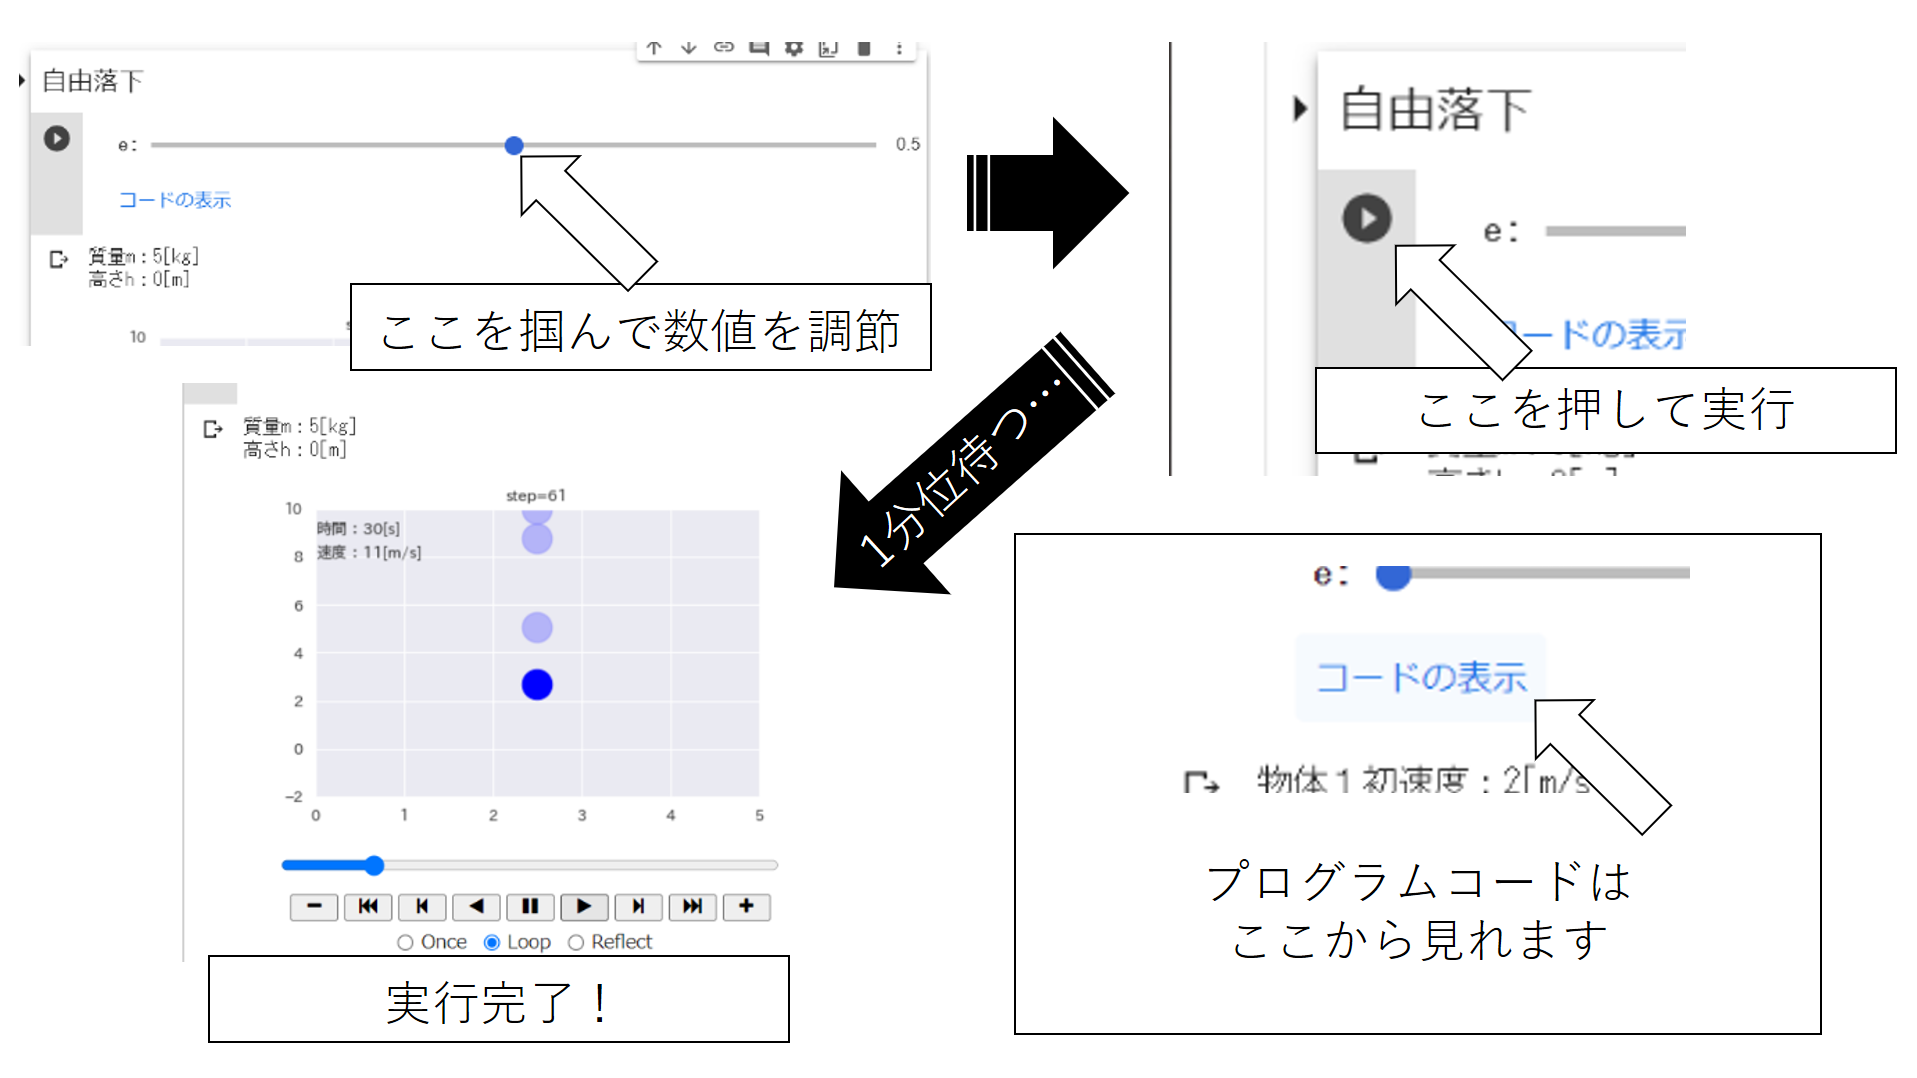

In [ ]:
#@title 必要なライブラリ・モジュールの読み込み（最初に実行） { display-mode: "form" }
#必要なライブラリ・モジュールの読み込み

#matplotlibの読み込み・日本語化
!pip install japanize-matplotlib #matplotlib日本語化ライブラリのインストール
import matplotlib as plt         #matplotlibライブラリのインポート
import japanize_matplotlib       #matplotlib日本語化ライブラリのインポート
import seaborn as sns            #seabornライブラリのインポート
sns.set(font="IPAexGothic")

#その他ライブラリの読み込み
import math                                         #mathライブラリのインポート
import numpy as np                                  #numpyライブラリのインポート
from matplotlib import pyplot as plt,animation,rc   #matplotlibライブラリのパッケージのインポート
from scipy.integrate import odeint                  #scipyライブラリのodeintパッケージのインポート

#カラーパレット
blue=(0,0,1)
lightblue=(0.5,0.5,1,0.5)
orange=(1,0.5,0)
lightorange=(1,0.75,0.5,0.5)
green=(0,1,0)
lightgreen=(0.5,1,0.5,0.5)
red=(1,0,0)
lightred=(1,0.5,0.5,0.5)
white=(1,1,1)

In [ ]:
#@title 自由落下 { display-mode: "form" }
#自由落下

#シミュレーションの描画
fps = 5
simulation_time = 80           #必要であれば変更
t_span=[0.0,simulation_time]          #シミュレート時間([0,100]だと0秒～10秒の結果を表示)
flames=int((t_span[1]-t_span[0])*fps)
t_eval=np.linspace(*t_span,flames)
speed=10
interval=100/fps/speed                #フレーム間の時間[ms](大きいとスローになる)

v = [0] * 10
m_list_f = []
i = 0
time = 0
first = True

#グラフの描画範囲
figtop = 10
figbottom = -2
figleft = 0
figright = 5

#2階常微分方程式（運動方程式、自由落下）
def func_motion(var, t):
    dxdt = var[1]
    dvdt = -gravity

    return [dxdt, dvdt]

#メイン実行部：値はここ
if (__name__ == '__main__'):
    t_list = np.linspace(0.0, 10.0, 500)  #微分の時間間隔の設定
    #質量
    m = 5
    #初速度
    v.append(0)
    #高さ
    h = 10
    gravity = 9.80665 #重力加速度
    #反発係数
    e = 0.8 #@param {type:"slider", min:0, max:1, step:0.1}

    for j in range(10):
      m_init = [h, v[j]]
      m_list = odeint(func_motion, m_init, t_list)
      m_list_f.append(m_list)
      for i in range(500):
        if m_list[i,0] < 0:
          v[j] = m_list[i,1]
          v[j+1] = -v[j] * e
          h = 0
          break

    print ('質量m：%d[kg]'%m)
    print ('高さh：10[m]')

def update(k):
    global i,time,first

    if first == True:
      i = 0
      first = False

    sfi=25 #ストロボのフレーム間隔

    plt.cla()
    plt.xlim(figleft,figright)
    plt.ylim(figbottom,figtop)
    plt.title('step='+str(k))
    plt.text(0,9,'時間t：%d[s]'%(k/(fps*10)))
    plt.text(0,8,'速度v：%d[m/s]'%-m_list_f[i][k-time,1])

    plt.scatter((m_list_f[i][0:k-time:sfi,0]*0+2.5),m_list_f[i][0:k-time:sfi,0],marker='o',color=lightblue,s=500) #ストロボ
    plt.scatter(2.5,m_list_f[i][k-time,0],marker='o',color=blue,s=500)
    if m_list_f[i][k-time,0] < 0:
      i = i + 1
      time = k
    if i > 9:
        i = 9

fig = plt.figure();
movie = animation.FuncAnimation(fig,update,frames=len(t_eval),interval=interval)
rc('animation',html='jshtml');
movie

In [ ]:
#@title 衝突運動 { display-mode: "form" }
#衝突運動

#シミュレーションの描画
fps = 5
simulation_time = 100 #必要であれば変更
t_span=[0.0,simulation_time] #シミュレート時間([0,100]だと0秒～10秒の結果を表示)
flames=int((t_span[1]-t_span[0])*fps)
t_eval=np.linspace(*t_span,flames)
speed=10
interval=100/fps/speed #フレーム間の時間[ms](大きいとスローになる)

#global変数の定義
collisionTIME = 0
collision = False
collisionP = 0
collisionA = 1
x1 = 0
x2 = 0
v1 = 0
v2 = 0

#グラフの描画範囲
figtop = 10
figbottom = 0
figleft = 0
figright = 20

#2階常微分方程式（運動方程式、等速・等加速度直線運動）
def func_motion(var, t):
    dxdt = var[1]
    dvdt = a

    return [dxdt, dvdt]

#メイン実行部
if (__name__ == '__main__'):
    t_list = np.linspace(0.0, 10.0, 500)  #微分の時間間隔の設定

    #質量
    m1 = 1 #@param {type:"slider", min:0, max:10, step:1}
    m2 = 3 #@param {type:"slider", min:0, max:10, step:1}
    #初速度
    v01 = 4 #@param {type:"slider", min:0, max:10, step:1}
    v02 = 0 #@param {type:"slider", min:0, max:10, step:1}
    #加速度
    a = 0
    #反発係数
    e = 0.5 #@param {type:"slider", min:0, max:1, step:0.1}
    #衝突後の速度
    v1 = ( -v01 + v02 )*( 1 + e )/( m1/m2 + 1 ) + v01
    v2 = ( -v02 + v01 )*( 1 + e )/( m2/m1 + 1 ) + v02

    m_init_1_B = [0, v01]  #位置と速度の初期値
    m_init_2_B = [10, v02]  #位置と速度の初期値
    m_list_1_B = odeint(func_motion, m_init_1_B, t_list)
    m_list_2_B = odeint(func_motion, m_init_2_B, t_list)
    #衝突後
    m_init_1_A = [0, v1]  #位置と速度の初期値
    m_init_2_A = [0, v2]  #位置と速度の初期値
    m_list_1_A = odeint(func_motion, m_init_1_A, t_list)
    m_list_2_A = odeint(func_motion, m_init_2_A, t_list)

    print ('物体１質量m1：%d[kg]'%m1)
    print ('物体２質量m2：%d[kg]'%m2)
    print ('物体１初速度v01：%d[m/s]'%v01)
    print ('物体２初速度v02：%d[m/s]'%v02)
    print ('反発係数e：%.1f'%e)

def update(k):
    sfi=25 #ストロボのフレーム間隔

    global collisionTIME,collision,collisionP,collisionA,x1,x2,v1,v2

    plt.cla()
    plt.xlim(figleft,figright)
    plt.ylim(figbottom,figtop)
    plt.title('step='+str(k))

    if m_list_1_B[k,0] >= m_list_2_B[k,0]:  #衝突
      if collision == False:
        collisionP = m_list_1_B[k,0]  #衝突地点の記録
        collisionTIME = k             #衝突時刻の記録
        collisionA = 0
      collision = True

    if collision == False:
      x1 = m_list_1_B[k,0]
      x2 = m_list_2_B[k,0]
      v1 = m_list_1_B[k,1]
      v2 = m_list_2_B[k,1]

    if collision == True:  
      plt.scatter(m_list_1_A[0:k-collisionTIME:sfi,0]+collisionP,(m_list_1_B[0:k-collisionTIME:sfi,0]*0+5),marker='o',color=lightblue,s=600) #ストロボ
      plt.scatter(m_list_2_A[0:k-collisionTIME:sfi,0]+collisionP,(m_list_2_B[0:k-collisionTIME:sfi,0]*0+5),marker='o',color=lightred,s=500) #ストロボ
      x1 = m_list_1_A[k-collisionTIME,0]+collisionP
      x2 = m_list_2_A[k-collisionTIME,0]+collisionP
      v1 = m_list_1_A[k-collisionTIME,1]
      v2 = m_list_2_A[k-collisionTIME,1]

    plt.scatter(m_list_1_B[0:(k*collisionA+collisionTIME):sfi,0],(m_list_1_B[0:(k*collisionA+collisionTIME):sfi,0]*0+5),marker='o',color=lightblue,s=600) #ストロボ
    plt.scatter(m_list_2_B[0:(k*collisionA+collisionTIME):sfi,0],(m_list_2_B[0:(k*collisionA+collisionTIME):sfi,0]*0+5),marker='o',color=lightred,s=500) #ストロボ
    
    plt.scatter(x1,5,marker='o',color=blue,s=600)
    plt.scatter(x2,5,marker='o',color=red,s=500)
    plt.text(x1-0.3,4.75,'%d'%m1,color=white)
    plt.text(x2-0.3,4.75,'%d'%m2,color=white)
    plt.text(0.4,9,'物体１速度v1：%.1f[m/s]'%v1)
    plt.text(0.4,8.5,'物体２速度v2：%.1f[m/s]'%v2)
    plt.text(0.4,8,'衝突時刻：%.1f[s]'%(collisionTIME/(fps*10)))
    plt.text(0.4,9.5,'時間t：%.1f[s]'%(k/(fps*10)))

fig = plt.figure();
movie = animation.FuncAnimation(fig,update,frames=len(t_eval),interval=interval)
rc('animation',html='jshtml');
movie

# 第２回模擬授業

In [ ]:
#必要なライブラリ・モジュールの読み込み

#matplotlibの読み込み・日本語化
import matplotlib as plt                          #matplotlib：グラフを描画するライブラリ：のインポート
!pip install japanize-matplotlib                  #japanize-matplotlib：matplotlibを日本語化するライブラリ：のインストール
import japanize_matplotlib                        #japanize-matplotlibのインポート
import seaborn as sns                             #seaborn：グラフの罫線等を描画するライブラリ：のインポート
sns.set(font="IPAexGothic")                       #グラフ内に表示されるのフォントの指定

#その他ライブラリの読み込み
import math                                       #math：三角関数等数学構造用のライブラリ：のインポート
import numpy as np                                #numpy：linspace関数用のライブラリ：のインポート
from matplotlib import pyplot as plt,animation,rc #matplotlib：動的描画のパッケージのインポート
from scipy.integrate import odeint                #scipyのodeintパッケージのインポート

In [ ]:
#カラーパレット
#「変数名」 = (赤,緑,青(,透明度))
#数値は0.0~1.0
blue=(0,0,1)                  #青
lightblue=(0.5,0.5,1,0.5)     #青（半透明）
orange=(1,0.5,0)              #オレンジ
lightorange=(1,0.75,0.5,0.5)  #オレンジ（半透明）
green=(0,1,0)                 #緑
lightgreen=(0.5,1,0.5,0.5)    #緑（半透明）
red=(1,0,0)                   #赤
lightred=(1,0.5,0.5,0.5)      #赤（半透明）
white=(1,1,1)                 #白

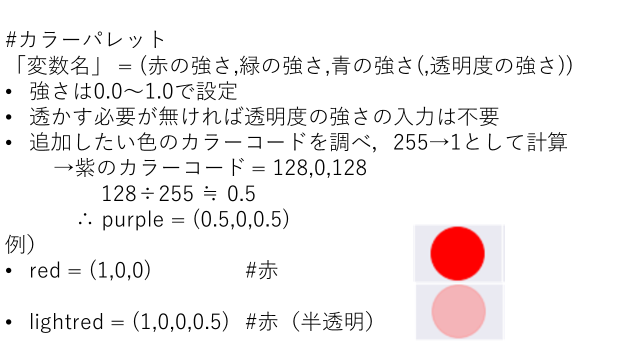

In [ ]:
#シミュレーションの描画
fps = 5
simulation_time = 100                 #描画の終了時間：100=10秒：適宜調節
t_span=[0.0,simulation_time]          #シミュレート時間（[0,100]だと0秒～10秒の結果を表示）
flames=int((t_span[1]-t_span[0])*fps) #フレームの計算（グラフ上部に表示）
t_eval=np.linspace(*t_span,flames)    #描画に使用する数値配列
speed=10                              #再生スピード
interval=100/fps/speed                #フレーム間の時間[ms]（大きいとスローになる）

In [ ]:
#グラフの描画範囲：適宜調節
figtop = 100    #描画範囲の指定（上）：適宜調節
figbottom = 0   #描画範囲の指定（下）：適宜調節
figleft = 0     #描画範囲の指定（左）：適宜調節
figright = 100  #描画範囲の指定（右）：適宜調節

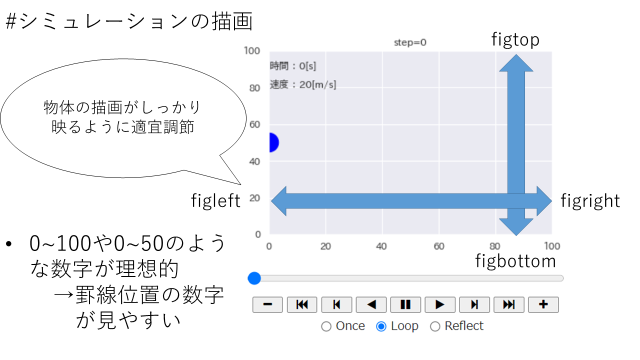

*   2階常微分方程式



```
def func_motion(var, t):  #微分関数
    dxdt = var[1]         #速度要素：適宜調整
    dvdt = a              #加速度要素：適宜調整

    return [dxdt, dvdt]   #ある時刻での戻り値[位置,速度]
```

位置と速度の初期値からある時刻の位置と速度を求めることができる。

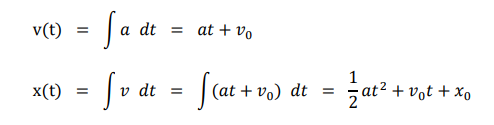

*   パラメータ



```
v0 = 20 #@param {type:"slider", min:0, max:50, step:5}
```

  　min：最小値　
  max：最大値　
  step：ステップ数（5なら0,5,10...と動かせる）

*   メイン実行部

```
m_init = [0, v0]                              #位置と速度の初期値
m_list = odeint(func_motion, m_init, t_list)  #時刻毎の位置，速度
```

m_initに位置と速度の初期値を設定する。
m_listには時刻毎の位置と速度の数値が配列で記録されていく。

　m_list[k,0]：位置　
  m_list[k,1]：速度

*   描画部分


```
plt.scatter(m_list[k,0],50,marker='o',color=blue,s=500)                                   #物体の描画：適宜調節
plt.scatter(m_list[0:k:sfi,0],(m_list[0:k:sfi,0]*0+50),marker='o',color=lightblue,s=500)  #ストロボの描画：適宜調節
```

　plt.scatter( 位置x , 位置y , marker='o' , color=カラーパレットから選択 , s=サイズ )

ストロボ表示をするときは，位置の変数をm_list[k,0]からm_list[0:k:sfi,0]に変更し，ストロボ表示で定数を扱う場合は(m_list[0:k:sfi,0]*0+定数)と表記する（エラー回避のため）。

In [ ]:
#等速・等加速直線運動

#2階常微分方程式（運動方程式、等速・等加速度直線運動）
def func_motion(var, t):  #微分関数
    dxdt = var[1]         #速度要素：適宜調整
    dvdt = 0              #加速度要素：適宜調整

    return [dxdt, dvdt]   #ある時刻での戻り値[位置,速度]

#メイン実行部
if (__name__ == '__main__'):
    t_list = np.linspace(0.0, 10.0, 500)          #微分の時間間隔の設定
    #初速度
    v0 = 20 #@param {type:"slider", min:0, max:50, step:5}
    m_init = [0, v0]                              #位置と速度の初期値
    m_list = odeint(func_motion, m_init, t_list)  #時刻毎の位置，速度
    
    print ('初速度v0：%d[m/s]'%v0)                #初速度の初期値の表示

def update(k):
    sfi=25  #ストロボのフレーム間隔

    plt.cla()                                       #描画開始
    plt.xlim(figleft,figright)                      #描画範囲の指定（横）
    plt.ylim(figbottom,figtop)                      #描画範囲の指定（縦）
    plt.title('step='+str(k))                       #描画フレームの表示
    plt.text(0,(figtop-10),'時間：%d[s]'%(k/(fps*10)))        #時刻の表示
    plt.text(0,(figtop-20),'速度：%d[m/s]'%abs(m_list[k,1])) #その時刻での速度の表示

    plt.scatter(m_list[k,0],50,marker='o',color=blue,s=500)                                   #物体の描画：適宜調節
    plt.scatter(m_list[0:k:sfi,0],(m_list[0:k:sfi,0]*0+50),marker='o',color=lightblue,s=500)  #ストロボの描画：適宜調節

#おまじない
fig = plt.figure();
movie = animation.FuncAnimation(fig,update,frames=len(t_eval),interval=interval)
rc('animation',html='jshtml');
movie

鉛直投げ上げシミュレータ



1.   上方向を正とする
2.   初速度0～10m/sで調節可能
1.   高さ4mから鉛直投げ上げ

→これらの条件で作成したシミュレータで，6[m]を超えるためのおおよその初速度を求める。


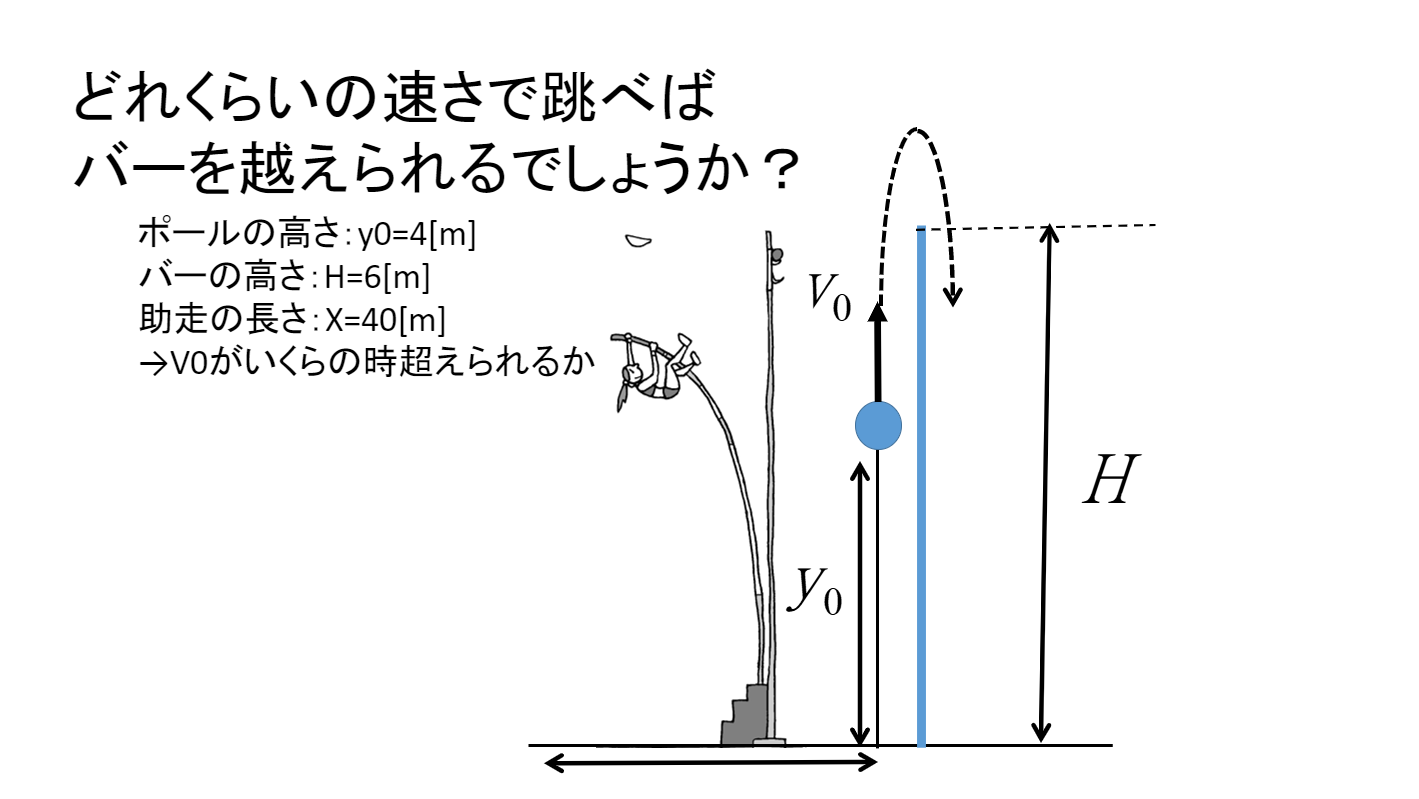

# ヒント
1.   シミュレート時間は3秒くらい
2.   初速度はチャリより遅い
1.   助走は考慮しない(グラフの描画範囲の設定で参考に)




```
#鉛直投げ上げ

#シミュレーションの描画
fps = 5
simulation_time = #入力               #描画の終了時間：100=10秒：適宜調節
t_span=[0.0,simulation_time]          #シミュレート時間（[0,100]だと0秒～10秒の結果を表示）
flames=int((t_span[1]-t_span[0])*fps) #フレームの計算（グラフ上部に表示）
t_eval=np.linspace(*t_span,flames)    #描画に使用する数値配列
speed=10                              #再生スピード
interval=100/fps/speed                #フレーム間の時間[ms]（大きいとスローになる）

#グラフの描画範囲
figtop =    #入力
figbottom = #入力
figleft =   #入力
figright =  #入力

#2階常微分方程式（運動方程式、鉛直投げ上げ）
def func_motion(var, t):
    dydt = var[1]
    dvdt =  #入力

    return [dydt, dvdt]

#メイン実行部
if (__name__ == '__main__'):
    t_list = np.linspace(0.0, 10.0, 500)  #微分の時間間隔の設定
    #初速度
    v0 =      #入力
    m_init =  #入力  #高さと速度の初期値
    m_list = odeint(func_motion, m_init, t_list)

    print ('初速度v0：%d[m/s]'%v0)

def update(k):
    sfi=25 #ストロボのフレーム間隔

    plt.cla()
    plt.xlim(figleft,figright)
    plt.ylim(figbottom,figtop)
    plt.title('step='+str(k))
    plt.text(0,(figtop-10),'時間：%d[s]'%(k/(fps*10)))
    plt.text(0,(figtop-20),'速度：%d[m/s]'%m_list[k,1])

    plt.scatter( )  #入力
    plt.scatter( )  #入力 #ストロボ

fig = plt.figure();
movie = animation.FuncAnimation(fig,update,frames=len(t_eval),interval=interval)
rc('animation',html='jshtml');
movie
```



In [ ]:
#鉛直投げ上げ：解答

#シミュレーションの描画
fps = 5
simulation_time = 30                  #描画の終了時間：100=10秒：適宜調節
t_span=[0.0,simulation_time]          #シミュレート時間（[0,100]だと0秒～10秒の結果を表示）
flames=int((t_span[1]-t_span[0])*fps) #フレームの計算（グラフ上部に表示）
t_eval=np.linspace(*t_span,flames)    #描画に使用する数値配列
speed=10                              #再生スピード
interval=100/fps/speed                #フレーム間の時間[ms]（大きいとスローになる）

#グラフの描画範囲
figtop =    10
figbottom = 0
figleft =   0
figright =  100

#2階常微分方程式（運動方程式、鉛直投げ上げ）
def func_motion(var, t):
    dydt = var[1]
    dvdt = -9.8 #重力加速度

    return [dydt, dvdt]

#メイン実行部
if (__name__ == '__main__'):
    t_list = np.linspace(0.0, 10.0, 500)  #微分の時間間隔の設定
    #初速度
    v0 = 7 #@param {type:"slider", min:0, max:10, step:1}
    m_init = [4,v0] #入力  #高さと速度の初期値
    m_list = odeint(func_motion, m_init, t_list)

    print ('初速度v0：%d[m/s]'%v0)

def update(k):
    sfi=25 #ストロボのフレーム間隔

    plt.cla()
    plt.xlim(figleft,figright)
    plt.ylim(figbottom,figtop)
    plt.title('step='+str(k))
    plt.text(0,(figtop-1),'時間：%d[s]'%(k/(fps*10)))
    plt.text(0,(figtop-2),'速度：%d[m/s]'%m_list[k,1])

    plt.scatter(40,m_list[k,0],marker='o',color=blue,s=500)  #入力
    plt.scatter((m_list[0:k:sfi,0]*0+40),m_list[0:k:sfi,0],marker='o',color=lightblue,s=500)  #入力 #ストロボ

fig = plt.figure();
movie = animation.FuncAnimation(fig,update,frames=len(t_eval),interval=interval)
rc('animation',html='jshtml');
movie